In [1]:
import glob
import io
import matplotlib.pyplot as plt
from datetime import datetime

def readcsvs():
    files = sorted(glob.glob('*.csv'))
    for filename in files:
        with open(filename,'r',encoding='utf8') as f:
            f.readline()
            for line in f.readlines():
                data = line.strip().strip('\ufeff').split('\t')
                yield data

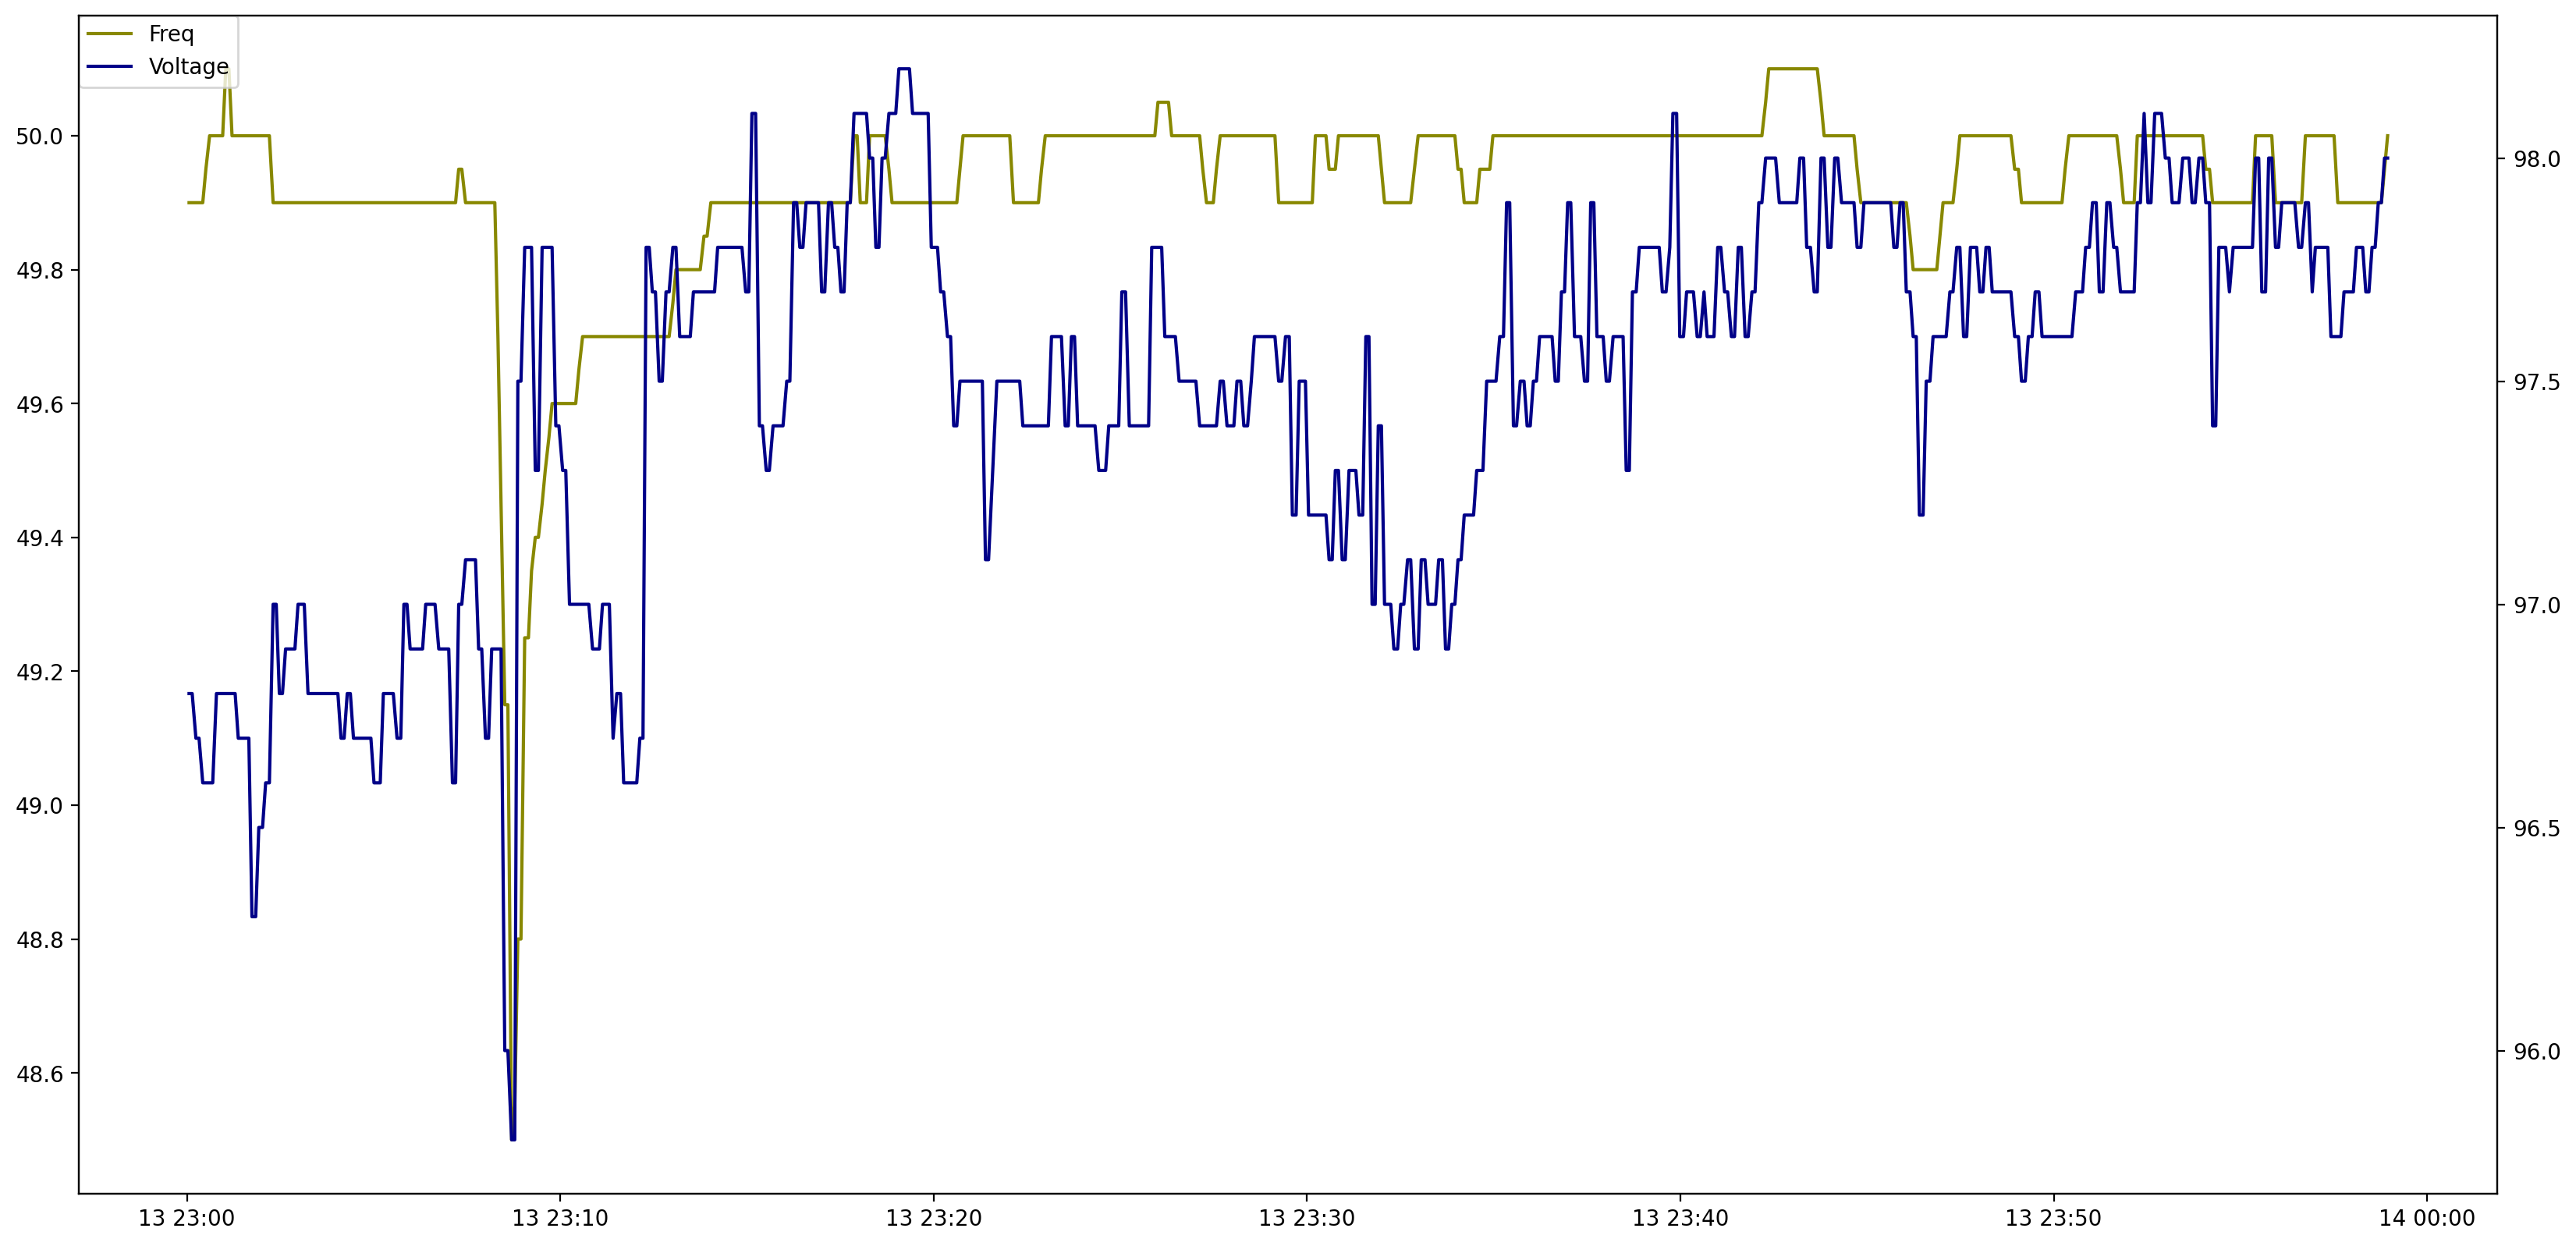

In [2]:
# プロットする時刻の範囲
start_time = datetime(2021,2,13,23,0)
end_time = datetime(2021,2,13,23,59)

plotdata = {
    'time': [],
    'volt': [],
    'freq': []
}

for line in readcsvs():
    time = datetime.strptime(line[0],'%Y-%m-%d %H:%M:%S.%f')
    volin = float(line[1])
    volout = float(line[2])
    freqin = float(line[3])
    freqout = float(line[4]) 
    
    if time < start_time or time > end_time:
        continue
    
    plotdata['time'].append(time)
    plotdata['freq'].append((freqin+freqout)/2)
    plotdata['volt'].append(volin)



fig, ax1 = plt.subplots(figsize=(20,10),dpi=200)
ax2 = ax1.twinx()
ax1.plot(plotdata['time'],plotdata['freq'], label="Freq",color='#888800')
ax2.plot(plotdata['time'],plotdata['volt'], label="Voltage",color='#000088')
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)